In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt 
import seaborn as sns

import os
from joblib import dump, load

In [2]:
world_wines_df = pd.read_csv('resources/winemag-data-130k-v2.csv')
world_wines_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
wines_df=world_wines_df[['country', 'points','price','region_1','variety']]
wines_df

,country,points,price,region_1,variety
0,Italy,87,NaN,Etna,White Blend
1,Portugal,87,15.0,NaN,Portuguese Red
2,US,87,14.0,Willamette Valley,Pinot Gris
3,US,87,13.0,Lake Michigan Shore,Riesling
4,US,87,65.0,Willamette Valley,Pinot Noir
...,...,...,...,...,...
129966,Germany,90,28.0,NaN,Riesling
129967,US,90,75.0,Oregon,Pinot Noir
129968,France,90,30.0,Alsace,Gewürztraminer
129969,France,90,32.0,Alsace,Pinot Gris


In [4]:
wines_df['region_1'].isna().sum()


21247

In [5]:
wines_df['points'].isna().sum()

0

In [6]:
wines_df['price'].isna().sum()

8996

In [7]:
wines_df['country'].isna().sum()

63

In [8]:
wines_df['variety'].isna().sum()

1

In [9]:
wines_df= wines_df.dropna()

In [10]:
wines_df.describe()

,points,price
count,101400.000000,101400.000000
mean,88.463343,36.936558
std,3.060467,41.895979
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [14]:
wines_df["country"].value_counts()


US           53989
France       17708
Italy        16889
Spain         6565
Argentina     3703
Australia     2292
Canada         254
Name: country, dtype: int64

In [15]:
wines_df["variety"].value_counts()

Pinot Noir                  11693
Chardonnay                  10070
Cabernet Sauvignon           8284
Red Blend                    7537
Bordeaux-style Red Blend     5123
                            ...  
Forcallà                        1
Meseguera                       1
Macabeo-Moscatel                1
Shiraz-Roussanne                1
Favorita                        1
Name: variety, Length: 509, dtype: int64

In [16]:
wines_df['variety'].value_counts()[wines_df['variety'].value_counts()> 500].count()


33

In [17]:
# lim_var_df=wines_df[wines_df['variety'].\
#                            isin(wines_df['variety'].value_counts()\
#                            [wines_df['variety'].value_counts() < 500].index)].drop()
lim_var_df = wines_df[wines_df.groupby('variety').variety.transform('count')>500].copy() 
lim_var_df['variety'].value_counts()
lim_var_df

,country,points,price,region_1,variety
2,US,87,14.0,Willamette Valley,Pinot Gris
3,US,87,13.0,Lake Michigan Shore,Riesling
4,US,87,65.0,Willamette Valley,Pinot Noir
7,France,87,24.0,Alsace,Gewürztraminer
9,France,87,27.0,Alsace,Pinot Gris
...,...,...,...,...,...
129965,France,90,28.0,Alsace,Pinot Gris
129967,US,90,75.0,Oregon,Pinot Noir
129968,France,90,30.0,Alsace,Gewürztraminer
129969,France,90,32.0,Alsace,Pinot Gris


In [18]:
#wines_df['price'].value_counts().hist(bins=300,figsize=(15,10))
#wines_df['price'].value_counts()
#wines_df.sort_values(['price'], ascending=False).head(30)
# test = df.sort_values(['one'], ascending=[False])
pd.qcut(lim_var_df['price'], q=8)
#pd.qcut['price'], q=10, precision=0)



2          (3.999, 15.0]
3          (3.999, 15.0]
4         (64.0, 3300.0]
7           (19.0, 24.0]
9           (24.0, 29.0]
               ...      
129965      (24.0, 29.0]
129967    (64.0, 3300.0]
129968      (29.0, 36.0]
129969      (29.0, 36.0]
129970      (19.0, 24.0]
Name: price, Length: 86650, dtype: category
Categories (8, interval[float64]): [(3.999, 15.0] < (15.0, 19.0] < (19.0, 24.0] < (24.0, 29.0] < (29.0, 36.0] < (36.0, 46.0] < (46.0, 64.0] < (64.0, 3300.0]]

In [19]:
cut_bins = [4,15,19,24,29,36,46,64,3300]
cut_labels = ["4-15","15-19","19-24","24-29","29-36","36-99", "46-64", "64-3300"]
lim_var_df['price_bins'] = pd.cut(lim_var_df['price'], bins=cut_bins, labels=cut_labels)
lim_var_df

,country,points,price,region_1,variety,price_bins
2,US,87,14.0,Willamette Valley,Pinot Gris,4-15
3,US,87,13.0,Lake Michigan Shore,Riesling,4-15
4,US,87,65.0,Willamette Valley,Pinot Noir,64-3300
7,France,87,24.0,Alsace,Gewürztraminer,19-24
9,France,87,27.0,Alsace,Pinot Gris,24-29
...,...,...,...,...,...,...
129965,France,90,28.0,Alsace,Pinot Gris,24-29
129967,US,90,75.0,Oregon,Pinot Noir,64-3300
129968,France,90,30.0,Alsace,Gewürztraminer,29-36
129969,France,90,32.0,Alsace,Pinot Gris,29-36


In [20]:
lim_var_df["region_1"].value_counts()

Napa Valley                          4242
Columbia Valley (WA)                 3834
Russian River Valley                 3009
California                           2468
Willamette Valley                    2200
                                     ... 
Riverland                               1
Mitterberg                              1
Périgord                                1
Vino de la Tierra del Bajo Aragón       1
Collioure                               1
Name: region_1, Length: 1057, dtype: int64

In [21]:
lim_var_df['region_1'].value_counts()[lim_var_df['region_1'].value_counts()> 600].count()

34

In [22]:
lim_reg_df = lim_var_df[lim_var_df.groupby('variety').region_1.transform('count')>600].copy() 
lim_reg_df['variety'].value_counts()
lim_reg_df

,country,points,price,region_1,variety,price_bins
2,US,87,14.0,Willamette Valley,Pinot Gris,4-15
3,US,87,13.0,Lake Michigan Shore,Riesling,4-15
4,US,87,65.0,Willamette Valley,Pinot Noir,64-3300
7,France,87,24.0,Alsace,Gewürztraminer,19-24
9,France,87,27.0,Alsace,Pinot Gris,24-29
...,...,...,...,...,...,...
129965,France,90,28.0,Alsace,Pinot Gris,24-29
129967,US,90,75.0,Oregon,Pinot Noir,64-3300
129968,France,90,30.0,Alsace,Gewürztraminer,29-36
129969,France,90,32.0,Alsace,Pinot Gris,29-36


In [23]:
wine_df=lim_reg_df[['country', 'points','variety','price_bins']] 
wine_df.reset_index(inplace=True)
wine_df = wine_df.drop('index', axis=1)
wine_df.head(30)

,country,points,variety,price_bins
0,US,87,Pinot Gris,4-15
1,US,87,Riesling,4-15
2,US,87,Pinot Noir,64-3300
3,France,87,Gewürztraminer,19-24
4,France,87,Pinot Gris,24-29
5,US,87,Cabernet Sauvignon,15-19
6,France,87,Gewürztraminer,29-36
7,US,87,Cabernet Sauvignon,29-36
8,US,87,Chardonnay,4-15
9,Argentina,87,Malbec,29-36


In [24]:
wine_df['points'].min()


80

<AxesSubplot:>

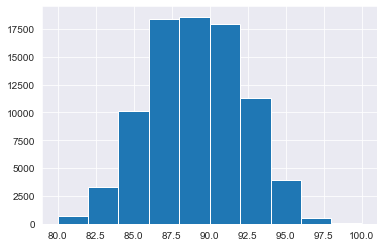

In [25]:
sns.set_style('darkgrid')
wine_df.points.hist()

In [26]:
# poor quality = 0, good quality = 1
wine_df['points'] = wine_df['points'].apply(lambda qual: 1 if qual>=87.5 else 0) 
wine_df
#wine_df['points'].value_counts()[wine_df['points'].value_counts()>0].count()

,country,points,variety,price_bins
0,US,0,Pinot Gris,4-15
1,US,0,Riesling,4-15
2,US,0,Pinot Noir,64-3300
3,France,0,Gewürztraminer,19-24
4,France,0,Pinot Gris,24-29
...,...,...,...,...
84877,France,1,Pinot Gris,24-29
84878,US,1,Pinot Noir,64-3300
84879,France,1,Gewürztraminer,29-36
84880,France,1,Pinot Gris,29-36


In [27]:
X = wine_df.drop('points', axis=1)
X

,country,variety,price_bins
0,US,Pinot Gris,4-15
1,US,Riesling,4-15
2,US,Pinot Noir,64-3300
3,France,Gewürztraminer,19-24
4,France,Pinot Gris,24-29
...,...,...,...
84877,France,Pinot Gris,24-29
84878,US,Pinot Noir,64-3300
84879,France,Gewürztraminer,29-36
84880,France,Pinot Gris,29-36


In [28]:
X_dummies = pd.get_dummies(X)
X_dummies

,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,variety_Barbera,variety_Bordeaux-style Red Blend,variety_Bordeaux-style White Blend,...,variety_White Blend,variety_Zinfandel,price_bins_4-15,price_bins_15-19,price_bins_19-24,price_bins_24-29,price_bins_29-36,price_bins_36-99,price_bins_46-64,price_bins_64-3300
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84877,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
84878,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84879,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84880,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
y_label = LabelEncoder().fit_transform(wine_df['points'])
y_label

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=42)

## LogisticRegression Model

In [32]:
clf = LogisticRegression().fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')


Training Score: 0.736290664614128
Testing Score: 0.7343669007115593


In [33]:
target_names = ["poor", "good"]

In [34]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, target_names=target_names))
cm

              precision    recall  f1-score   support

        poor       0.70      0.55      0.61      8145
        good       0.75      0.85      0.80     13076

    accuracy                           0.73     21221
   macro avg       0.72      0.70      0.71     21221
weighted avg       0.73      0.73      0.73     21221



array([[ 4462,  3683],
       [ 1954, 11122]], dtype=int64)

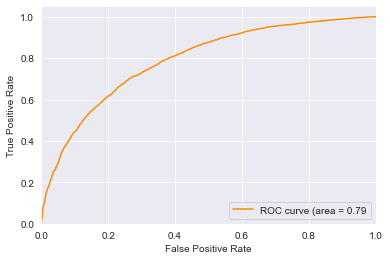

In [36]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## RandomForestRegression Model

In [37]:
rfc = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=30).fit(X_train, y_train)
y_r_pred = rfc.predict(X_test)
y_true = y_test
cm_r = confusion_matrix(y_true, y_r_pred)
cm_r
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print(classification_report(y_true, y_r_pred, target_names=target_names))
cm_r

Training Score: 0.7430137760952545
Testing Score: 0.7332830686584044
              precision    recall  f1-score   support

        poor       0.69      0.56      0.62      8145
        good       0.75      0.84      0.80     13076

    accuracy                           0.73     21221
   macro avg       0.72      0.70      0.71     21221
weighted avg       0.73      0.73      0.73     21221



array([[ 4522,  3623],
       [ 2037, 11039]], dtype=int64)

In [38]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_true, y_r_pred))
print("Precision:",metrics.precision_score(y_true, y_r_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_r_pred))

Accuracy: 0.7332830686584044
Precision: 0.7528986495703178
Sensitivity: 0.8442184154175589


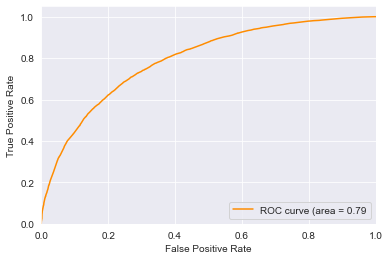

In [40]:
y_rfc_pred_proba =rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_rfc_pred_proba)
auc = metrics.roc_auc_score(y_test, y_rfc_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [41]:
dump(rfc,'World_Wine_Quality.joblib')

['World_Wine_Quality.joblib']